# 📈 CAPM Model – Capital Asset Pricing Model

This notebook demonstrates how to implement the CAPM model using Python. We’ll estimate the expected return of an asset based on its risk relative to the market (beta).

## 🛠️ Libraries and Setup

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression

## 📥 Download Historical Data
We'll use Apple, Amazon and Generals Motors Company (AAPL, AMZN, GM) as the stocks and S&P 500 ETF (SPY) as the market index.

In [ ]:
stock_list = ['AAPL', 'AMZN', 'GM', 'SPY']
data = yf.download(stock_list, start='2019-01-01', end='2024-12-31') ['Close']
data.column = ['AAPL', 'AMZN', 'GM', 'SPY'] #Assign names to the columns
data.head()

[*********************100%***********************]  4 of 4 completed
<ipython-input-40-965aed7d380c>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Ticker,AAPL,AMZN,GM,SPY
Date,,,,
2019-01-02,37.667183,76.956497,31.011354,226.954773
2019-01-03,33.915253,75.014000,29.729969,221.538940
2019-01-04,35.363071,78.769501,30.725578,228.959595
2019-01-07,35.284370,81.475502,31.675093,230.764847
2019-01-08,35.956985,82.829002,32.089935,232.933014


## 📊 Normalize Stock Prices

In [ ]:

def normalize_prices(df):
  df_ = df.copy()
  for stock in df_.columns: #Iterate over each column (stock) in the DataFrame
    df_[stock] = df_[stock]/df_[stock].iloc[0]
  return df_   #The function returns the DataFrame with normalized prices.

norm_df = normalize_prices(data) #Store the normalized prices
norm_df.head()

Ticker,AAPL,AMZN,GM,SPY
Date,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.900393,0.974759,0.958680,0.976137
2019-01-04,0.938830,1.023559,0.990785,1.008834
2019-01-07,0.936740,1.058722,1.021403,1.016788
2019-01-08,0.954597,1.076309,1.034780,1.026341


## 📊 Plot Normalized Stock Prices

In [ ]:
fig = px.line(title = 'Normalized Stock Prices')  #Initialize a plot

for stock in norm_df.columns:  #This loop adds a line for each stock in norm_df.
  fig.add_scatter(x = norm_df.index.values, y = norm_df[stock], name = stock) #The x-axis (dates) and y-axis (prices) are defined

fig.show()

## 📊 Calculate Daily Returns

In [ ]:
daily_returns = norm_df.pct_change() #Calculate the daily percentage change of the normalized prices.
daily_returns.iloc[0] = 0
daily_returns.head()

Ticker,AAPL,AMZN,GM,SPY
Date,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.099607,-0.025241,-0.041320,-0.023863
2019-01-04,0.042689,0.050064,0.033488,0.033496
2019-01-07,-0.002226,0.034353,0.030903,0.007885
2019-01-08,0.019063,0.016612,0.013097,0.009396


## 📦Plot a Boxplot of Daily Returns

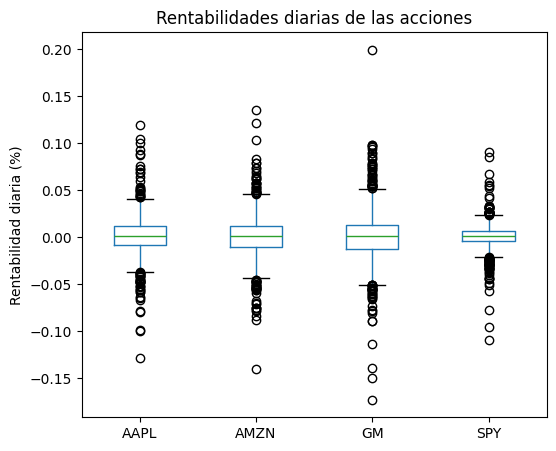

In [ ]:
daily_returns.boxplot(figsize=(6,5),grid=False) #Create a box-and-whisker plot with the daily returns.
plt.title('Rentabilidades diarias de las acciones')
plt.ylabel('Rentabilidad diaria (%)')
plt.show()


## 🗂️📈 Initialize Empty Dictionaries and Plot Regression Lines

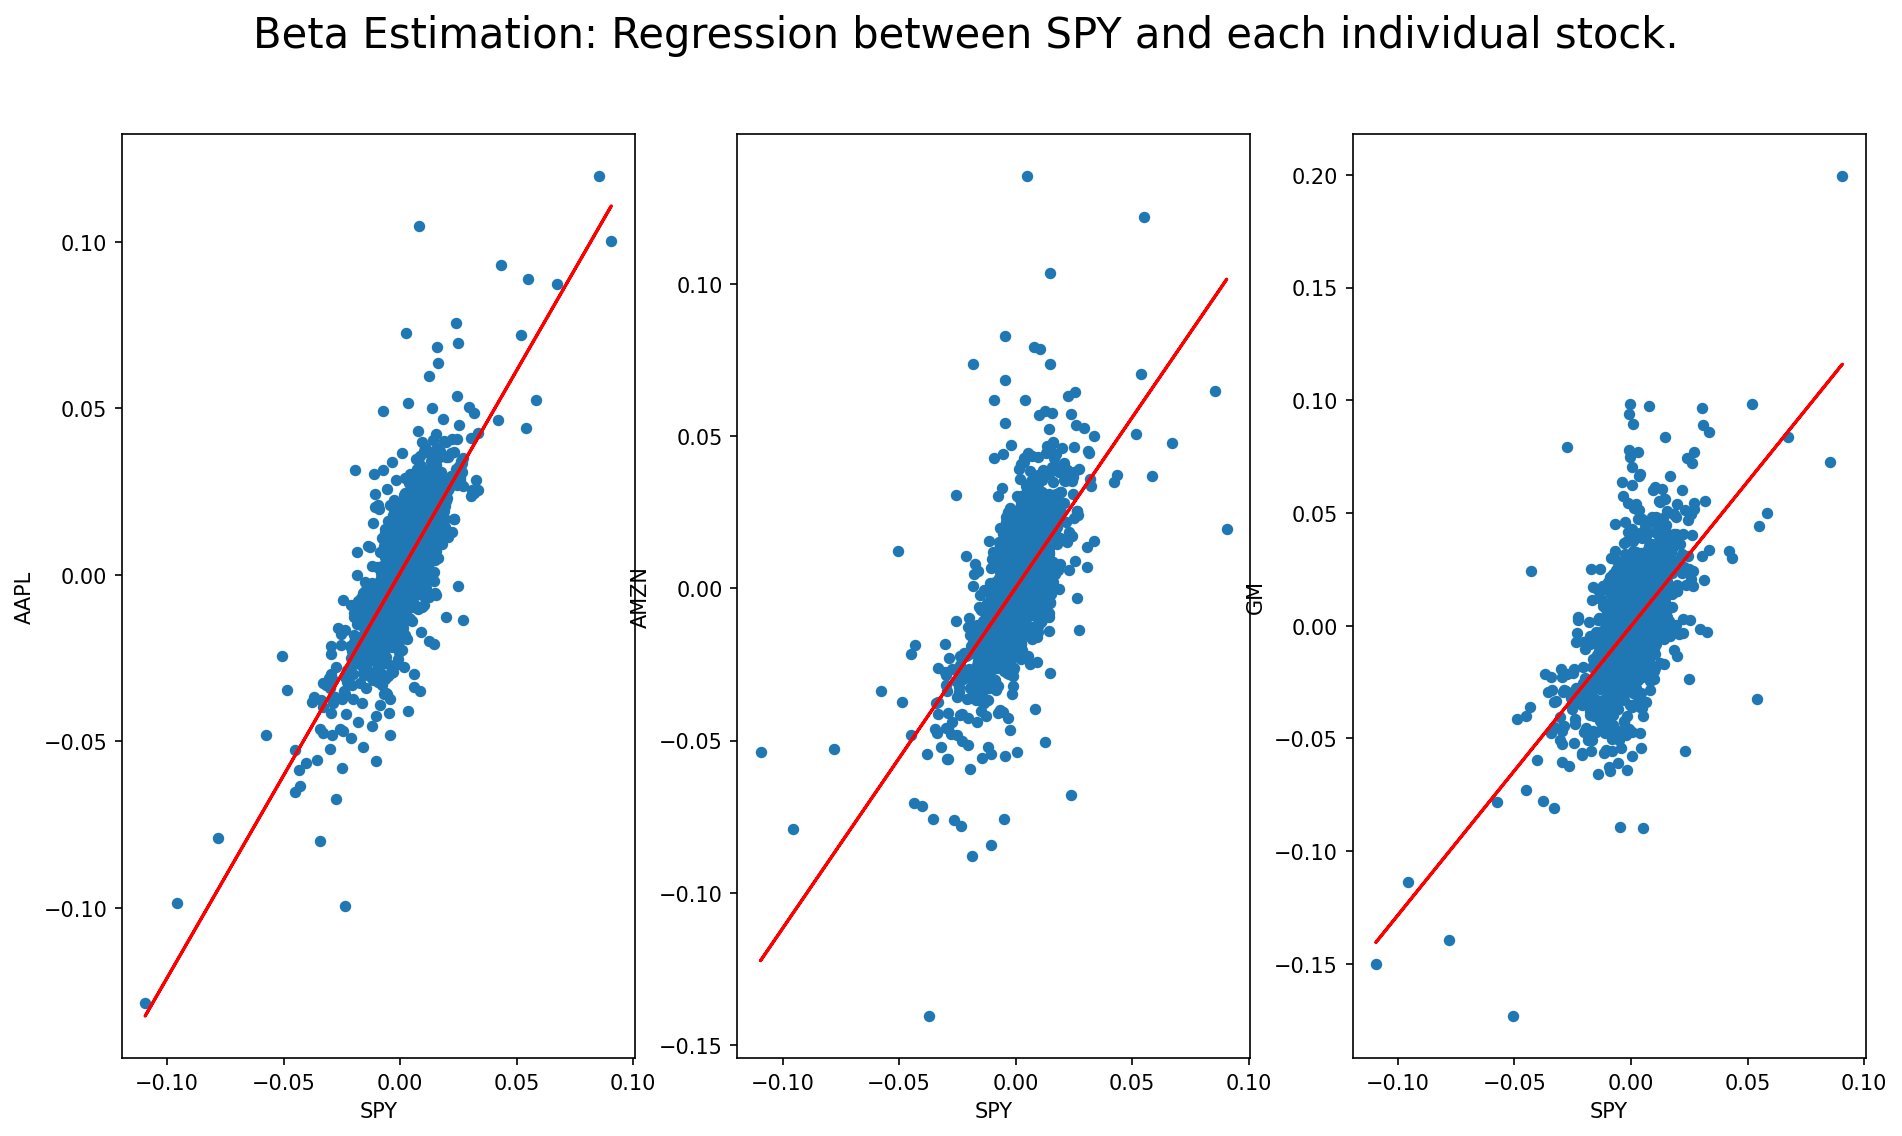

In [ ]:
beta, alpha = dict(), dict()  #Empty dictionaries to store the coefficients.

#Build a subplot.

fig, axes = plt.subplots(1, 3, dpi=150, figsize=(15,8)) #Create a figure with three subplots.

axes = axes.flatten() #Convert the array of axes into a one-dimensional list to simplify access in the following for loop.

#For loop over each daily return.

for idx, stock in enumerate(daily_returns.columns.values[:-1]):
  #This loop iterates over each column in daily_returns, except for the last one (the market index SPY).
  #enumerate` provides the index (`idx`) and the name of each stock (`stock`), allowing iteration for each stock in `daily_returns`.

#Scatter plot between the stock returns and the market return.

  daily_returns.plot.scatter(x='SPY', y=stock, ax=axes[idx]) #For each stock, a scatter plot is created.

#Fit a regression line using polyfit of degree 1.

  b_, a_ = np.polyfit(daily_returns['SPY'], daily_returns[stock], 1) #Calculate the linear regression coefficients b_ and a_.

  regression_line = b_*daily_returns['SPY'] + a_ #Calculate the regression line.

#Plot the regression line.

  axes[idx].plot(daily_returns['SPY'], regression_line, 'r')

#Save the results.

  beta[stock] = b_
  alpha[stock] = a_

  plt.suptitle('Beta Estimation: Regression between SPY and each individual stock.', size=20)
  plt.show



## 📐Calculate the Beta Coefficient Using a Statistical Method

In [ ]:

keys = list(beta.keys()) # Convert the beta keys (the stock names) into a list called keys.

beta_3 = dict() #Create an empty dictionary called `beta_3`, where the beta values calculated using the statistical approach will be stored.

for k in keys: #This loop allows the calculation of beta for each stock.
  beta_3[k] = [daily_returns[[k,'SPY']].cov()/ daily_returns['SPY'].var()][0].iloc[0,1] #Calculate beta using covariance and variance.

print(beta_3)

{'AAPL': np.float64(1.2171869940624114), 'AMZN': np.float64(1.1187921313695255), 'GM': np.float64(1.281732065948787)}


## 📈 Calculate the Expected Return for Each Stock

In [ ]:

ER = dict() #Empty dictionary to store the expected returns using CAPM.

rf = 0.0457

trading_days = 252

#Estimate the market return using daily returns.

rm = daily_returns['SPY'].mean()*trading_days

#For loop over each stock

for k in keys: #Allows the calculation of the expected return for each stock according to CAPM.
  ER[k] = rf + beta[k]*(rm - rf)

for k in keys: #Allows printing of the expected returns.
 print('Expected return according to the CAPM model for {} is {}%'.format(k, round(ER[k]*100,2)))



Expected return according to the CAPM model for AAPL is 20.72%
Expected return according to the CAPM model for AMZN is 19.41%
Expected return according to the CAPM model for GM is 21.57%
